# Introduction:

The dataset for further analysis is customer service log from a certain company.

# The questions about this dataset:

How many channels are typically required for a single call? 

Can you provide a range for the duration of calls? 

Are there specific trends describing whether calls are solved? 

Which channels should we prioritize for improvement? 

How should we measure the success of future improvement?

In [1]:
# Import the required library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the csv file and convert it to be a pandas dataframe and print out the head
df = pd.read_csv("call_logging.csv")
df.head()

,time,is_solved,userId,channelName
0,1.556374e+09,0,26643,channel_0
1,1.546934e+09,0,636656,channel_1
2,1.544429e+09,0,485014,channel_2
3,1.547461e+09,0,772798,channel_1
4,1.546843e+09,0,877701,channel_3


In [3]:
# Check the rows and columns of this dataset
df.shape  

(14772712, 4)

In [4]:
# Check datatypes 
df.dtypes

time           float64
is_solved        int64
userId           int64
channelName     object
dtype: object

In [5]:
# Check each columns number of unique values 
df.nunique()

time           7929452
is_solved            2
userId         1000976
channelName         23
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14772712 entries, 0 to 14772711
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   time         float64
 1   is_solved    int64  
 2   userId       int64  
 3   channelName  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 450.8+ MB


In [7]:
# Check null values in each column
df.isnull().sum()

time           146601
is_solved           0
userId              0
channelName    219224
dtype: int64

In [8]:
# Drop all rows with all NaN and NaT values in "channelName" AND "time" columns
df.dropna(inplace=True)

In [9]:
# Confirm the deletion
df.isnull().sum()

time           0
is_solved      0
userId         0
channelName    0
dtype: int64

In [10]:
# Check if there are some duplicates
df.duplicated().sum()

86

In [11]:
# Drop the duplicates
df.drop_duplicates(inplace=True)

In [12]:
# Confirm the deletion of duplicates
df.duplicated().sum()

0

In [13]:
# Convert the UNIX time format to pandas datetime
df["time"] = pd.to_datetime(df["time"], unit="s")

### How many channels are typically required for a single call?

In [14]:
# Count the channels used for each customer
# Deactivate multiindexing for easier use
channels_used = df.groupby(["userId"], as_index=False)["channelName"].value_counts()
channels_used

,userId,channelName,count
0,1,channel_5,4
1,1,channel_3,2
2,1,channel_0,1
3,1,channel_4,1
4,1,channel_2,1
...,...,...,...
6990849,10001000,channel_2,23
6990850,10001000,channel_15,19
6990851,10001000,channel_18,13
6990852,10001000,channel_21,9


In [15]:
# Count how many channels that were used only once for each customer
counts_of_channels_used_only_once = channels_used.groupby(["userId"]).sum()
counts_of_channels_used_only_once.tail()

/tmp/ipykernel_345/1020544123.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  counts_of_channels_used_only_once = channels_used.groupby(["userId"]).sum()


,count
userId,
10000996,3711
10000997,3712
10000998,3690
10000999,3665
10001000,3672


In [16]:
# Convert groupby series to dataframe and reset the index
user_df = pd.DataFrame(counts_of_channels_used_only_once).reset_index()
user_df

,userId,count
0,1,14
1,2,6
2,3,15
3,4,11
4,5,14
...,...,...
1000963,10000996,3711
1000964,10000997,3712
1000965,10000998,3690
1000966,10000999,3665


In [17]:
# Rename the "count" column
user_df.rename(columns={"count": "counts_of_channels_used_only_once"}, inplace=True)

In [18]:
# Use arithmetic mean to find the typical channels required for a single call
channels_typically_required_for_a_single_call = int(user_df["counts_of_channels_used_only_once"].mean(numeric_only=True).round())
f"The typical channels required for a single call are: {channels_typically_required_for_a_single_call} channels"

'The typical channels required for a single call are: 14 channels'

### Can you provide a range for the duration of calls?

In [19]:
# Sort the data by time
df.sort_values(by="time", inplace=True)

In [20]:
# Get the time interval between two adjacent calls
df["time_interval"] = df["time"].diff().apply(lambda x: x.total_seconds())

In [21]:
# Calculate the range of duration of calls by subtracting the maximum with the minimum value 
range_of_duration_of_calls = int(df["time_interval"].max() - df["time_interval"].min())
f"Range for the duration of the calls is: {range_of_duration_of_calls} seconds"

'Range for the duration of the calls is: 78 seconds'

### Are there specific trends describing whether calls are solved?

In [22]:
df1 = df.drop(columns="time_interval")

In [50]:
time_grp_is_solved = df1.groupby("time", as_index=False)["is_solved"].value_counts()

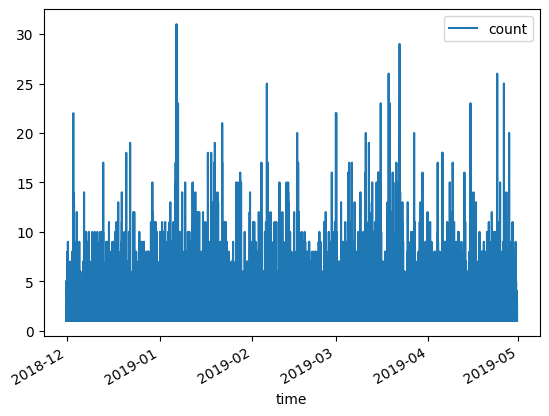

In [90]:
time_grp_is_solved.loc[channel_grp_is_solved["is_solved"] == 1].plot(x="time", y="count")
plt.show()

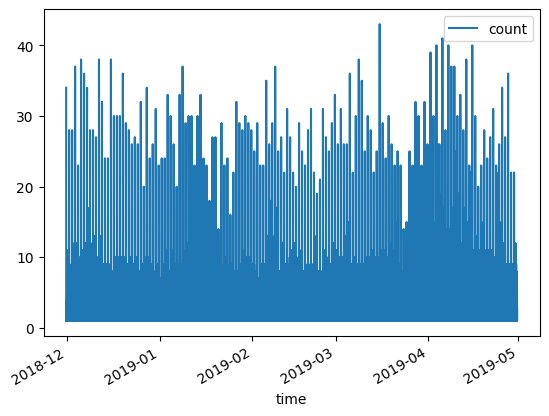

In [30]:
time_grp_is_solved.loc[channel_grp_is_solved["is_solved"] == 0].plot(x="time", y="count")
plt.show()

In [78]:
time_grp_is_solved.loc[channel_grp_is_solved["is_solved"] == 1]

,time,is_solved,count
1,2018-11-30 17:00:00,1,5
3,2018-11-30 17:00:01,1,1
5,2018-11-30 17:00:02,1,3
7,2018-11-30 17:00:03,1,3
9,2018-11-30 17:00:04,1,2
...,...,...,...
8510988,2019-04-30 16:55:55,1,1
8511008,2019-04-30 16:56:32,1,1
8511026,2019-04-30 16:57:06,1,1
8511027,2019-04-30 16:57:07,1,1
